In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
athlete_df = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [16]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
#join both dataframe
athlete_df = athlete_df.merge(regions, on="NOC", how = "left")

In [18]:
athlete_df.rename({"region":"Region","notes":"Notes"}, axis = 1, inplace=True)

In [19]:
#cheching for null value
feature_with_na = [feature for feature in athlete_df.columns if athlete_df[feature].isna().sum()>0]
athlete_df[feature_with_na].isna().sum()

Age         9474
Height     60171
Weight     62875
Medal     231333
Region       370
Notes     266077
dtype: int64

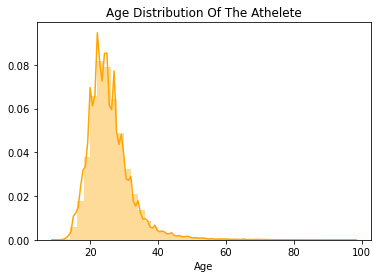

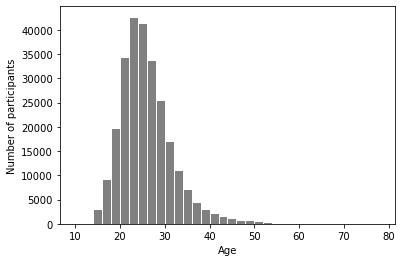

In [132]:
# range of age group of athletes 
plt.title("Age Distribution Of The Athelete")
sns.distplot(athlete_df["Age"], bins = np.arange(10,80,2), color = "orange")
plt.show()

plt.hist(athlete_df["Age"], bins = np.arange(10,80,2), color = "grey", edgecolor = "white")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.show()

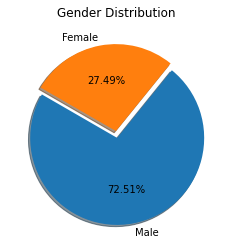

In [143]:
#Gender participants 
plt.title("Gender Distribution")
plt.pie(athlete_df["Sex"].value_counts(),labels = ["Male", "Female"],explode = [0.08,0] ,autopct = '%0.2f%%', shadow = True, startangle = 150)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

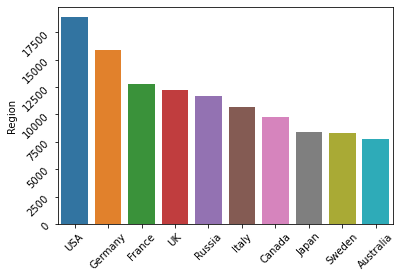

In [33]:
# Top 10 all time participants
top_10_region = athlete_df["Region"].value_counts().sort_values(ascending = False).head(10)
#Let's plot all the top Region
sns.barplot(top_10_region.index, top_10_region )
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)

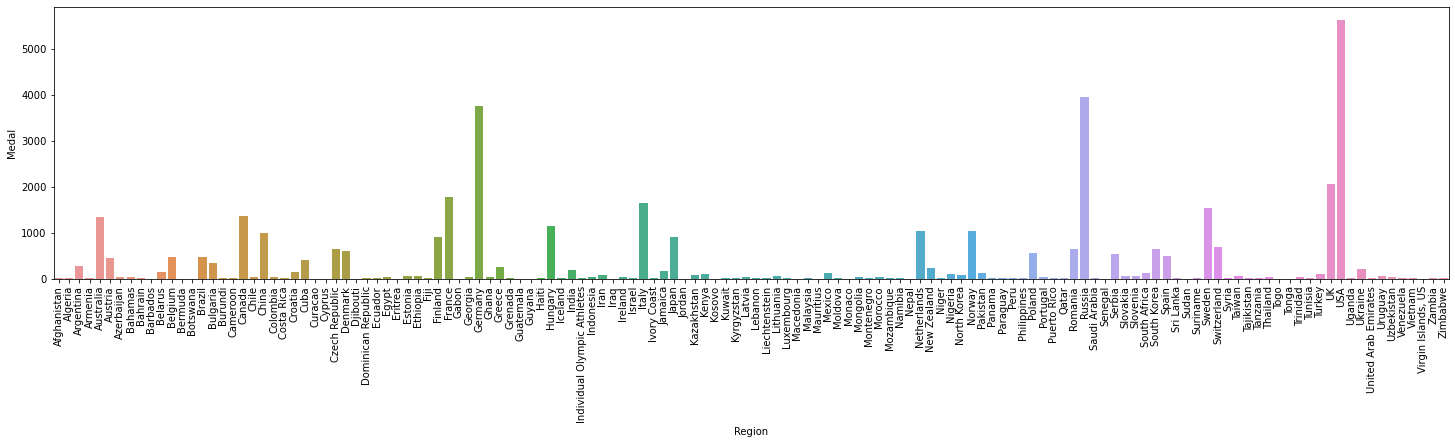

In [64]:
#Let's visualize how many madels have been won by each countries
plt.figure(figsize=(25,5))
medal_won = athlete_df.groupby("Region")["Medal"].count()
medal_won = medal_won[medal_won > 0]
sns.barplot(medal_won.index, medal_won)
plt.xticks(rotation = 90)
plt.show()

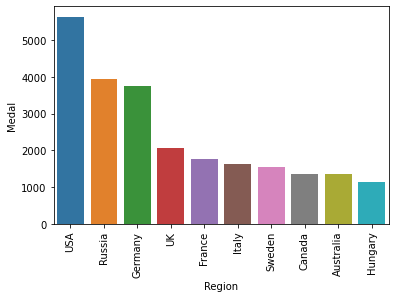

In [90]:
#Let's visualize which are the top regions to win maximum medals
medal_won = athlete_df.groupby("Region")["Medal"].count()
medal_won = medal_won.sort_values(ascending=False).head(10)
medal_won = medal_won[medal_won > 0]
sns.barplot(medal_won.index, medal_won)
plt.xticks(rotation = 90)
plt.show()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


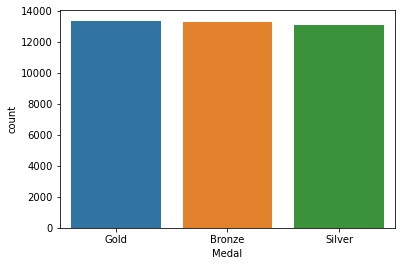

In [150]:
# Total number of medal won 
print(athlete_df.Medal.value_counts())
sns.countplot(athlete_df.Medal)
plt.show()

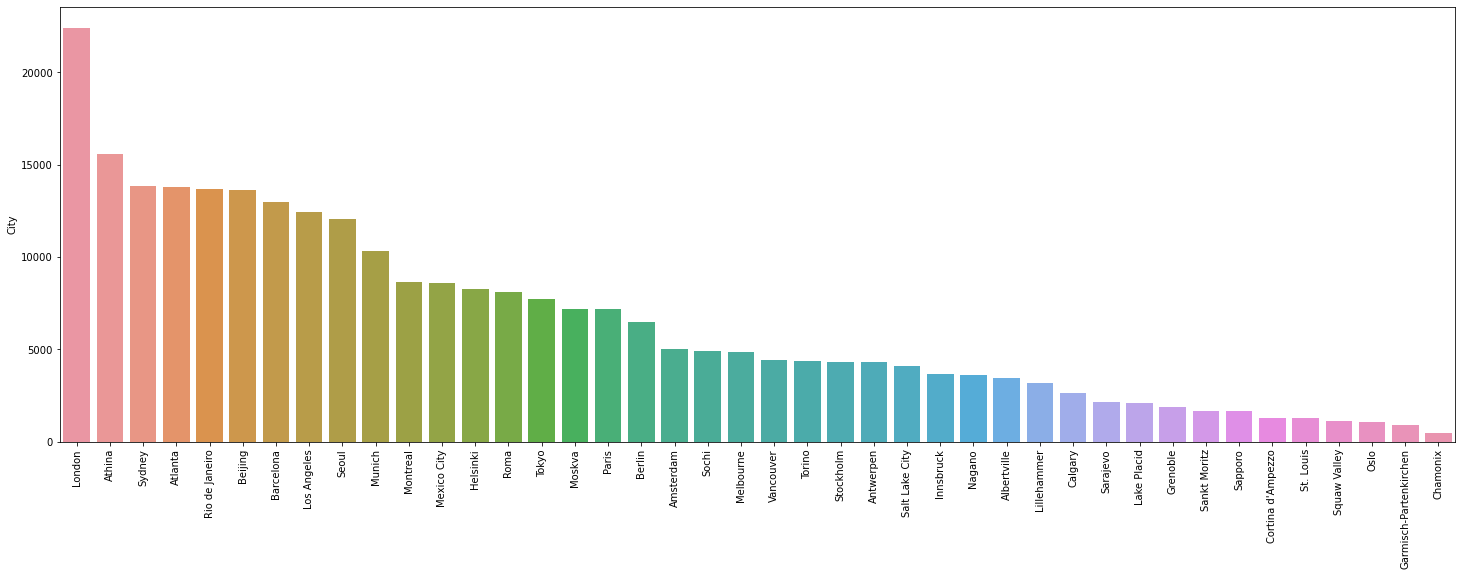

In [86]:
## Which city is oragnise more olympics event
plt.figure(figsize=(25,8))
most_city = athlete_df["City"].value_counts().sort_values(ascending=False)
sns.barplot(most_city.index, most_city)
plt.xticks(rotation = 90)
plt.show()

In [138]:
# Which Sports are being played in winter 
winter_sports  = athlete_df[athlete_df["Season"] == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [139]:
#Summer olympics sports
summer_sports  = athlete_df[athlete_df["Season"] == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

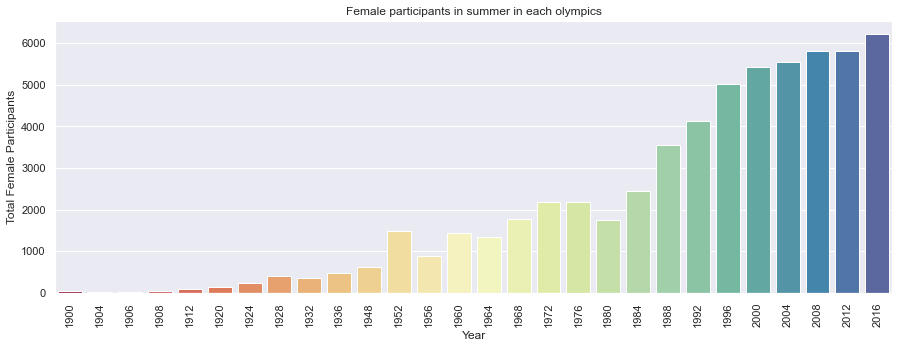

In [197]:
#Total Number of female athlete each olympics
#Female participants in summer
plt.figure(figsize = (15,5))
plt.title("Female participants in summer in each olympics")
female_athlete = athlete_df[(athlete_df.Sex=="F") & (athlete_df.Season == "Summer")]
sns.countplot(x = "Year",data = female_athlete, palette = "Spectral")
plt.xticks(rotation = 90)
plt.ylabel("Total Female Participants")
plt.show()

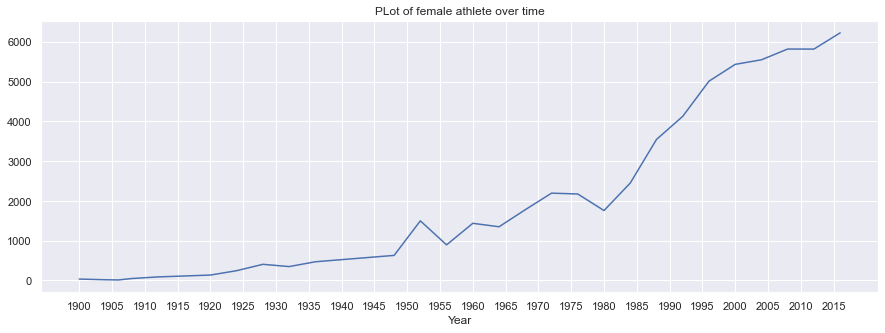

In [203]:
plt.figure(figsize = (15,5))
sns.set(style = "darkgrid")
plt.title("PLot of female athlete over time")
female_athlete.groupby("Year")["Sex"].count().plot()
plt.xticks(np.arange(1900,2020,5))
plt.show()

In [213]:
#Gold Medal Athletes
gold_medals = athlete_df[athlete_df["Medal"] == "Gold"]
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [219]:
#GOld beyond 60
gold_medals["Name"][gold_medals["Age"]>60]
gold_medal.count()

6

In [217]:
sporting_event = gold_medals["Sport"][gold_medals["Age"]>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

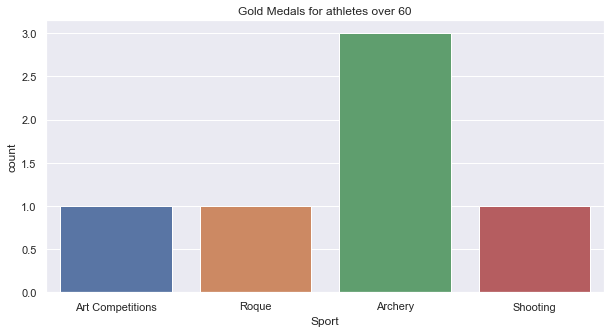

In [221]:
#PLotting for sport_event
plt.figure(figsize= (10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title("Gold Medals for athletes over 60")
plt.show()

In [233]:
## Gold medal from each country
gold_medal_countries = gold_medals["Region"].value_counts().reset_index(name="Medal")
gold_medal_countries.head()

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


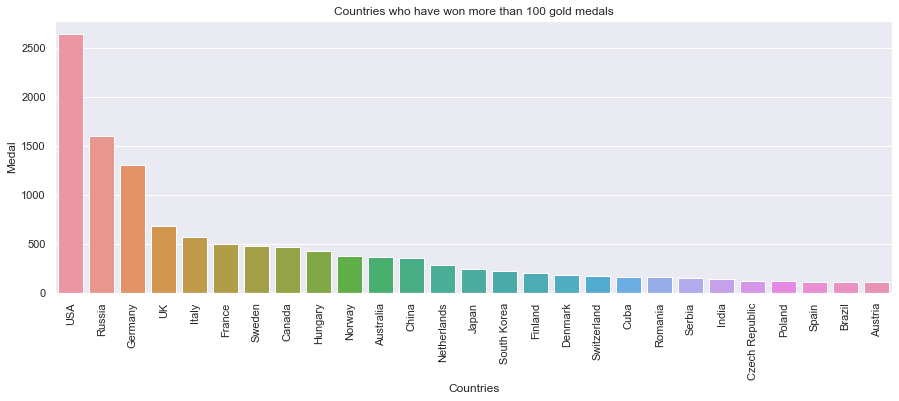

In [246]:
#Plotting the countries who have won more than 100 gold medals
plt.figure(figsize = (15,5))
plt.title("Countries who have won more than 100 gold medals")
gold_medal_100 = gold_medal_countries[gold_medal_countries["Medal"] > 100]
sns.barplot(gold_medal_100["index"], gold_medal_100.Medal)
plt.xticks(rotation = 90)
plt.xlabel("Countries")
plt.show()

Text(0.5, 0, 'Height in CM')

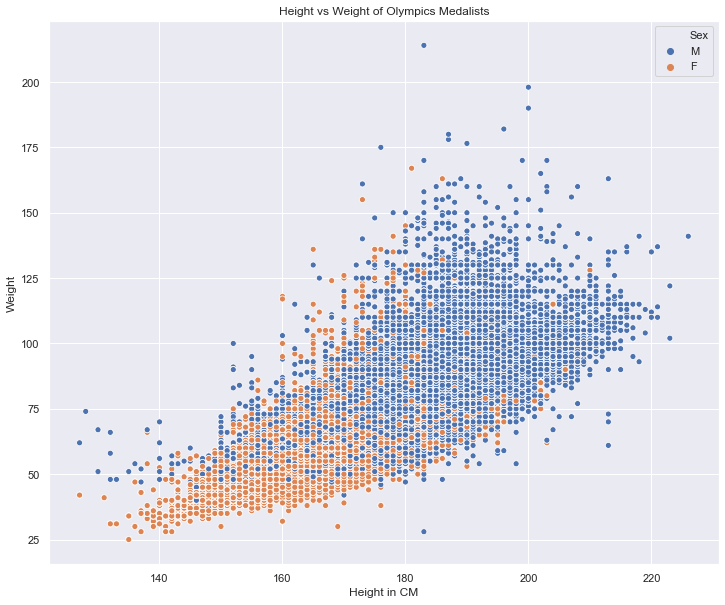

In [250]:
# PLotting the height and weight of the athletes 
plt.figure(figsize=(12,10))
sns.scatterplot(x = "Height", y = "Weight", data = athlete_df, hue = "Sex")
plt.title("Height vs Weight of Olympics Medalists")
plt.xlabel("Height in CM")